# Game Analysis And questions Answered:

# Q. Determine the outliers for Wages and mentioned the steps, process and logic

# Q. Analyze the distribution for potential column.

# Q. Difference between normal and standard normal distribution explain it.

# Importing the libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
import statistics

# Importing the datset

In [43]:
game_df = pd.read_excel(r'C:\Users\Admin\Downloads\Game.xlsx', sheet_name = 'Game_data')
game_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,16,Luis García,37,https://cdn.sofifa.org/players/4/19/16.png,Spain,https://cdn.sofifa.org/flags/45.png,71,71,KAS Eupen,https://cdn.sofifa.org/teams/2/light/2013.png,€750K,€6K,1906,Right,1.0,4.0,3.0,Medium/ Medium,Lean,No,RCM,10.0,"Jul 19, 2014",NaN,2019,5'10,143lbs,66+2,66+2,66+2,67+2,68+2,68+2,68+2,67+2,69+2,69+2,69+2,67+2,69+2,69+2,69+2,67+2,62+2,65+2,65+2,65+2,62+2,59+2,59+2,59+2,59+2,59+2,68.0,64.0,61.0,76.0,68.0,69.0,79.0,79.0,71.0,71.0,56.0,50.0,62.0,65.0,72.0,75.0,54.0,64.0,60.0,71.0,71.0,71.0,72.0,73.0,75.0,79.0,70.0,43.0,40.0,9.0,12.0,13.0,11.0,11.0,€1.1M
1,41,Iniesta,34,https://cdn.sofifa.org/players/4/19/41.png,Spain,https://cdn.sofifa.org/flags/45.png,86,86,Vissel Kobe,https://cdn.sofifa.org/teams/2/light/101146.png,€21.5M,€21K,2058,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,8.0,"Jul 16, 2018",NaN,2021,5'7,150lbs,74+3,74+3,74+3,82+3,81+3,81+3,81+3,82+3,85+3,85+3,85+3,82+3,83+3,83+3,83+3,82+3,71+3,73+3,73+3,73+3,71+3,68+3,63+3,63+3,63+3,68+3,77.0,70.0,54.0,90.0,74.0,90.0,80.0,70.0,85.0,92.0,70.0,67.0,79.0,86.0,84.0,65.0,47.0,55.0,58.0,71.0,58.0,66.0,81.0,93.0,71.0,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,€26.9M
2,80,E. Belözoğlu,37,https://cdn.sofifa.org/players/4/19/80.png,Turkey,https://cdn.sofifa.org/flags/48.png,79,79,Medipol Başakşehir FK,https://cdn.sofifa.org/teams/2/light/101014.png,€4M,€23K,2047,Left,2.0,4.0,4.0,Medium/ Medium,Stocky,No,CM,5.0,"Jul 9, 2015",NaN,2019,5'7,159lbs,67+2,67+2,67+2,72+2,72+2,72+2,72+2,72+2,76+2,76+2,76+2,73+2,78+2,78+2,78+2,73+2,68+2,74+2,74+2,74+2,68+2,65+2,66+2,66+2,66+2,65+2,80.0,68.0,43.0,86.0,69.0,78.0,83.0,80.0,87.0,82.0,54.0,38.0,68.0,73.0,81.0,77.0,72.0,61.0,65.0,76.0,87.0,66.0,63.0,86.0,85.0,80.0,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0,€7.6M
3,164,G. Pinzi,37,https://cdn.sofifa.org/players/4/19/164.png,Italy,https://cdn.sofifa.org/flags/27.png,70,70,Padova,https://cdn.sofifa.org/teams/2/light/110912.png,€240K,€2K,1882,Right,2.0,3.0,3.0,Low/ High,Normal,No,LCM,11.0,"Aug 31, 2017",NaN,2019,5'11,168lbs,63+2,63+2,63+2,64+2,64+2,64+2,64+2,64+2,65+2,65+2,65+2,64+2,66+2,66+2,66+2,64+2,68+2,69+2,69+2,69+2,68+2,67+2,69+2,69+2,69+2,67+2,63.0,53.0,62.0,69.0,61.0,66.0,58.0,54.0,64.0,67.0,65.0,62.0,69.0,67.0,63.0,71.0,69.0,74.0,67.0,65.0,75.0,70.0,61.0,65.0,65.0,68.0,74.0,71.0,66.0,5.0,15.0,7.0,6.0,13.0,€372K
4,657,D. Vaughan,35,https://cdn.sofifa.org/players/4/19/657.png,Wales,https://cdn.sofifa.org/flags/50.png,66,66,Notts County,https://cdn.sofifa.org/teams/2/light/1937.png,€150K,€4K,1781,Left,1.0,3.0,2.0,Medium/ High,Stocky,No,CDM,8.0,"Jul 6, 2018",NaN,2019,5'6,154lbs,59+2,59+2,59+2,59+2,60+2,60+2,60+2,59+2,62+2,62+2,62+2,59+2,65+2,65+2,65+2,59+2,60+2,65+2,65+2,65+2,60+2,59+2,62+2,62+2,62+2,59+2,64.0,59.0,58.0,72.0,57.0,62.0,68.0,67.0,68.0,68.0,33.0,33.0,60.0,67.0,91.0,70.0,60.0,50.0,58.0,66.0,74.0,63.0,55.0,64.0,66.0,82.0,59.0,66.0,62.0,6.0,9.0,10.0,9.0,7.0,€263K


# Basic Information

In [44]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null 

In [45]:
game_df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.

- We can see the mean and standard deviation and median from the above stats for each numerical column

In [46]:
game_df.shape

(18207, 88)

In [47]:
game_df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

# Cleaning the dataset

In [48]:
game_df.isnull().sum() # checking for null values

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS            

In [49]:
# Handling missing values in column - CLUB

game_df['Club']= game_df['Club'].fillna('Free Agent')

In [50]:
# Finding 48 Players with almost no information and removing them

game_df = game_df[game_df['Height'].notnull()]
game_df.shape


(18159, 88)

In [51]:
game_df.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                            0
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                       0
Real Face                       0
Position                       12
Jersey Number                  12
Joined                       1505
Loaned From                 16895
Contract Valid Until          241
Height                          0
Weight                          0
LS                           2037
ST                           2037
RS            

In [52]:
# Handling missing Values in other columns with modes
modes = game_df.mode().iloc[0]

# fiiling missing values with the Germany_df modes
game_df['Jersey Number'].fillna(modes['Jersey Number'], inplace=True)

# filling some other values custom values
game_df['Club']= game_df['Club'].fillna('Free Agent')
game_df['Joined']= game_df['Joined'].fillna('No Information')
game_df['Loaned From']= game_df['Loaned From'].fillna('NA')
game_df['Contract Valid Until']= game_df['Contract Valid Until'].fillna('No Information')
game_df['Release Clause']= game_df['Release Clause'].fillna('No Release Clause')

# The position column can be filled by mode of position (ST)
game_df.dropna(subset=['Position'], inplace=True)

game_df.isnull().sum()

ID                             0
Name                           0
Age                            0
Photo                          0
Nationality                    0
Flag                           0
Overall                        0
Potential                      0
Club                           0
Club Logo                      0
Value                          0
Wage                           0
Special                        0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Real Face                      0
Position                       0
Jersey Number                  0
Joined                         0
Loaned From                    0
Contract Valid Until           0
Height                         0
Weight                         0
LS                          2025
ST                          2025
RS                          2025
LW        

In [53]:
# selecting the dataset for goal keepers

df_goalkeeper = game_df.loc[game_df["Position"]=="GK"]
df_goalkeeper.isnull().sum()

ID                             0
Name                           0
Age                            0
Photo                          0
Nationality                    0
Flag                           0
Overall                        0
Potential                      0
Club                           0
Club Logo                      0
Value                          0
Wage                           0
Special                        0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Real Face                      0
Position                       0
Jersey Number                  0
Joined                         0
Loaned From                    0
Contract Valid Until           0
Height                         0
Weight                         0
LS                          2025
ST                          2025
RS                          2025
LW        

- Now we know that remaining all the missing values are of the players who are goal keepers
- they do not play at any other position, so we can fill the missing value of goalkeepers with 'NA' 

In [54]:
game_df.fillna(value='NA', inplace=True)

### Further Cleaning

In [55]:
# For Values column
game_df["Value"] = game_df["Value"].str.split('€').str[1]
game_df['Value (Number)'] = game_df['Value'].str.replace('([A-Z]+)', '')
game_df['K or M'] = game_df['Value'].str.extract('([A-Z]+)')
game_df['K or M'] = game_df['K or M'].str.replace('K','1000')
game_df['K or M'] = game_df['K or M'].str.replace('M','1000000')
game_df['K or M'] = pd.to_numeric(game_df['K or M'])
game_df['Value (Number)'] = pd.to_numeric(game_df['Value (Number)'])


#  for wage column
game_df["Wage"] = game_df["Wage"].str.split('€').str[1]
game_df['Wage (Number)'] = game_df['Wage'].str.replace('([A-Z]+)', '')
game_df['Wage (k or M)'] = game_df['Value'].str.extract('([A-Z]+)')
game_df['Wage (k or M)'] = game_df['Wage (k or M)'].str.replace('K','1000')
game_df['Wage (k or M)'] = game_df['Wage (k or M)'].str.replace('M','1000000')
game_df['Wage (k or M)'] = pd.to_numeric(game_df['Wage (k or M)'])
game_df['Wage (Number)'] = pd.to_numeric(game_df['Wage (Number)'])

# multiplying to get the final result
game_df['Value (€)'] = game_df['Value (Number)'] * game_df['K or M']
game_df['Wage (€)'] = game_df['Wage (Number)'] * game_df['Wage (k or M)']

# remove extra columns
game_df.drop(['Value (Number)','Wage (Number)','Value','K or M','Wage (k or M)','Value','Wage'], axis=1, inplace = True)

game_df.head(2)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Value (€),Wage (€)
0,16,Luis García,37,https://cdn.sofifa.org/players/4/19/16.png,Spain,https://cdn.sofifa.org/flags/45.png,71,71,KAS Eupen,https://cdn.sofifa.org/teams/2/light/2013.png,1906,Right,1.0,4.0,3.0,Medium/ Medium,Lean,No,RCM,10.0,"Jul 19, 2014",NA,2019,5'10,143lbs,66+2,66+2,66+2,67+2,68+2,68+2,68+2,67+2,69+2,69+2,69+2,67+2,69+2,69+2,69+2,67+2,62+2,65+2,65+2,65+2,62+2,59+2,59+2,59+2,59+2,59+2,68.0,64.0,61.0,76.0,68.0,69.0,79.0,79.0,71.0,71.0,56.0,50.0,62.0,65.0,72.0,75.0,54.0,64.0,60.0,71.0,71.0,71.0,72.0,73.0,75.0,79.0,70.0,43.0,40.0,9.0,12.0,13.0,11.0,11.0,€1.1M,750000.0,6000.0
1,41,Iniesta,34,https://cdn.sofifa.org/players/4/19/41.png,Spain,https://cdn.sofifa.org/flags/45.png,86,86,Vissel Kobe,https://cdn.sofifa.org/teams/2/light/101146.png,2058,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,8.0,"Jul 16, 2018",NA,2021,5'7,150lbs,74+3,74+3,74+3,82+3,81+3,81+3,81+3,82+3,85+3,85+3,85+3,82+3,83+3,83+3,83+3,82+3,71+3,73+3,73+3,73+3,71+3,68+3,63+3,63+3,63+3,68+3,77.0,70.0,54.0,90.0,74.0,90.0,80.0,70.0,85.0,92.0,70.0,67.0,79.0,86.0,84.0,65.0,47.0,55.0,58.0,71.0,58.0,66.0,81.0,93.0,71.0,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,€26.9M,21500000.0,21000000.0


In [56]:
# more cleaning
cols = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM',
        'CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM',
        'CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
for col in cols:
    game_df[col] = game_df[col].str.split('+').str[0]
    
game_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Value (€),Wage (€)
0,16,Luis García,37,https://cdn.sofifa.org/players/4/19/16.png,Spain,https://cdn.sofifa.org/flags/45.png,71,71,KAS Eupen,https://cdn.sofifa.org/teams/2/light/2013.png,1906,Right,1.0,4.0,3.0,Medium/ Medium,Lean,No,RCM,10.0,"Jul 19, 2014",NA,2019,5'10,143lbs,66,66,66,67,68,68,68,67,69,69,69,67,69,69,69,67,62,65,65,65,62,59,59,59,59,59,68.0,64.0,61.0,76.0,68.0,69.0,79.0,79.0,71.0,71.0,56.0,50.0,62.0,65.0,72.0,75.0,54.0,64.0,60.0,71.0,71.0,71.0,72.0,73.0,75.0,79.0,70.0,43.0,40.0,9.0,12.0,13.0,11.0,11.0,€1.1M,750000.0,6000.0
1,41,Iniesta,34,https://cdn.sofifa.org/players/4/19/41.png,Spain,https://cdn.sofifa.org/flags/45.png,86,86,Vissel Kobe,https://cdn.sofifa.org/teams/2/light/101146.png,2058,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,8.0,"Jul 16, 2018",NA,2021,5'7,150lbs,74,74,74,82,81,81,81,82,85,85,85,82,83,83,83,82,71,73,73,73,71,68,63,63,63,68,77.0,70.0,54.0,90.0,74.0,90.0,80.0,70.0,85.0,92.0,70.0,67.0,79.0,86.0,84.0,65.0,47.0,55.0,58.0,71.0,58.0,66.0,81.0,93.0,71.0,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,€26.9M,21500000.0,21000000.0
2,80,E. Belözoğlu,37,https://cdn.sofifa.org/players/4/19/80.png,Turkey,https://cdn.sofifa.org/flags/48.png,79,79,Medipol Başakşehir FK,https://cdn.sofifa.org/teams/2/light/101014.png,2047,Left,2.0,4.0,4.0,Medium/ Medium,Stocky,No,CM,5.0,"Jul 9, 2015",NA,2019,5'7,159lbs,67,67,67,72,72,72,72,72,76,76,76,73,78,78,78,73,68,74,74,74,68,65,66,66,66,65,80.0,68.0,43.0,86.0,69.0,78.0,83.0,80.0,87.0,82.0,54.0,38.0,68.0,73.0,81.0,77.0,72.0,61.0,65.0,76.0,87.0,66.0,63.0,86.0,85.0,80.0,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0,€7.6M,4000000.0,23000000.0
3,164,G. Pinzi,37,https://cdn.sofifa.org/players/4/19/164.png,Italy,https://cdn.sofifa.org/flags/27.png,70,70,Padova,https://cdn.sofifa.org/teams/2/light/110912.png,1882,Right,2.0,3.0,3.0,Low/ High,Normal,No,LCM,11.0,"Aug 31, 2017",NA,2019,5'11,168lbs,63,63,63,64,64,64,64,64,65,65,65,64,66,66,66,64,68,69,69,69,68,67,69,69,69,67,63.0,53.0,62.0,69.0,61.0,66.0,58.0,54.0,64.0,67.0,65.0,62.0,69.0,67.0,63.0,71.0,69.0,74.0,67.0,65.0,75.0,70.0,61.0,65.0,65.0,68.0,74.0,71.0,66.0,5.0,15.0,7.0,6.0,13.0,€372K,240000.0,2000.0
4,657,D. Vaughan,35,https://cdn.sofifa.org/players/4/19/657.png,Wales,https://cdn.sofifa.org/flags/50.png,66,66,Notts County,https://cdn.sofifa.org/teams/2/light/1937.png,1781,Left,1.0,3.0,2.0,Medium/ High,Stocky,No,CDM,8.0,"Jul 6, 2018",NA,2019,5'6,154lbs,59,59,59,59,60,60,60,59,62,62,62,59,65,65,65,59,60,65,65,65,60,59,62,62,62,59,64.0,59.0,58.0,72.0,57.0,62.0,68.0,67.0,68.0,68.0,33.0,33.0,60.0,67.0,91.0,70.0,60.0,50.0,58.0,66.0,74.0,63.0,55.0,64.0,66.0,82.0,59.0,66.0,62.0,6.0,9.0,10.0,9.0,7.0,€263K,150000.0,4000.0


In [57]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18147 entries, 0 to 18206
Data columns (total 88 columns):
ID                          18147 non-null int64
Name                        18147 non-null object
Age                         18147 non-null int64
Photo                       18147 non-null object
Nationality                 18147 non-null object
Flag                        18147 non-null object
Overall                     18147 non-null int64
Potential                   18147 non-null int64
Club                        18147 non-null object
Club Logo                   18147 non-null object
Special                     18147 non-null int64
Preferred Foot              18147 non-null object
International Reputation    18147 non-null float64
Weak Foot                   18147 non-null float64
Skill Moves                 18147 non-null float64
Work Rate                   18147 non-null object
Body Type                   18147 non-null object
Real Face                   18147 non-null 

# EDA

In [58]:
# top 10 countries with maximum number of players
game_df["Nationality"].value_counts()[0:10]

England        1657
Germany        1195
Spain          1071
Argentina       936
France          911
Brazil          825
Italy           699
Colombia        616
Japan           478
Netherlands     452
Name: Nationality, dtype: int64

The average number of players is  110.65243902439025


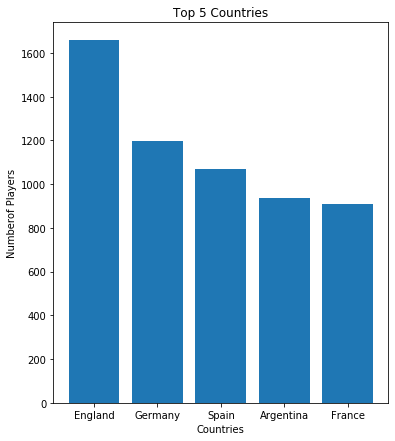

In [59]:
x= list(game_df["Nationality"].value_counts()[0:5].keys())
y=list(game_df["Nationality"].value_counts()[0:5])

plt.figure(figsize=(6,7))
plt.bar(x,y)
plt.title("Top 5 Countries")
plt.xlabel("Countries")
plt.ylabel("Numberof Players")
plt.plot()

print('The average number of players is ', np.mean(game_df["Nationality"].value_counts()))

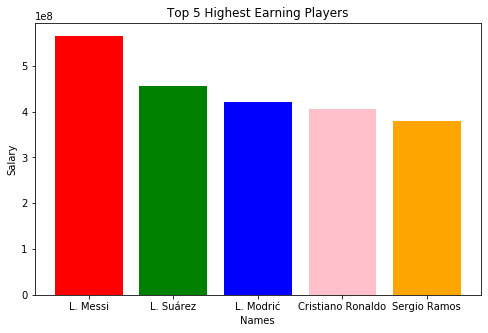

In [60]:
player_salary=game_df[["Name","Wage (€)"]]
player_salary=player_salary.sort_values(by=["Wage (€)"],ascending=False)
x=list(player_salary["Name"][0:5])
y=list(player_salary["Wage (€)"][0:5])
plt.figure(figsize=(8,5))
plt.bar(x,y,color=["red","green","blue","pink","orange"])
plt.xlabel("Names")
plt.ylabel("Salary")
plt.title("Top 5 Highest Earning Players")
plt.show()

- Messi earns the most 

In [61]:
#  players with highest Overall
game_df[['Name',"Overall"]].sort_values(by=["Overall"],ascending=False)[0:5]

,Name,Overall
45,Cristiano Ronaldo,94
699,L. Messi,94
3255,Neymar Jr,92
1519,L. Suárez,91
616,Sergio Ramos,91


- Ronaldo and Messi are the best players in the game with 94 overall each

In [62]:
#  Best 5 spanish players
game_df[game_df['Nationality'] == 'Spain'][['Name',"Overall"]].sort_values(by=["Overall"],ascending=False)[0:5]

,Name,Overall
616,Sergio Ramos,91
3591,De Gea,91
1074,David Silva,90
2985,Sergio Busquets,89
4031,Isco,88


In [63]:
# Position wise best player
max_overall_by_pos = game_df.groupby('Position')['Overall'].idxmax()
max_pos = game_df.loc[max_overall_by_pos, ['Position', 'Name', 'Overall']]
max_pos

,Position,Name,Overall
3867,CAM,A. Griezmann,89
2039,CB,D. Godín,90
2985,CDM,Sergio Busquets,89
2326,CF,S. Giovinco,82
2983,CM,Thiago,86
3591,GK,De Gea,91
4217,LAM,J. Rodríguez,88
1533,LB,Marcelo,88
325,LCB,G. Chiellini,89
1074,LCM,David Silva,90


- These are the best players each position wise in our dataset

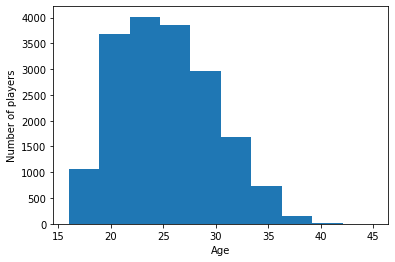

In [64]:
plt.hist(game_df['Age'])
plt.xlabel('Age')
plt.ylabel('Number of players')
plt.show()

- Most of the players are between 20-25 years of age

In [65]:
# country wise best players

max_overall_by_country = game_df.groupby('Nationality')['Overall'].idxmax()
max_con = game_df.loc[max_overall_by_pos, ['Nationality', 'Name', 'Overall']]
max_con

,Nationality,Name,Overall
3867,France,A. Griezmann,89
2039,Uruguay,D. Godín,90
2985,Spain,Sergio Busquets,89
2326,Italy,S. Giovinco,82
2983,Spain,Thiago,86
3591,Spain,De Gea,91
4217,Colombia,J. Rodríguez,88
1533,Brazil,Marcelo,88
325,Italy,G. Chiellini,89
1074,Spain,David Silva,90


- Each countries best player

In [66]:
free = game_df.loc[game_df["Club"]=="Free Agent"]
free[['Name','Overall']].sort_values(by=['Overall'],ascending  = False)

,Name,Overall
660,A. Granqvist,80
5997,L. Paredes,80
2646,I. Smolnikov,79
11389,A. Lunev,79
2668,A. Dzyuba,78
5430,Luís Neto,77
630,J. Villar,77
9445,D. Kuzyaev,77
2133,G. Sio,77
1435,C. Riveros,76


- Best free agents (highest rated players with no team and can be transferred for 0 euros)

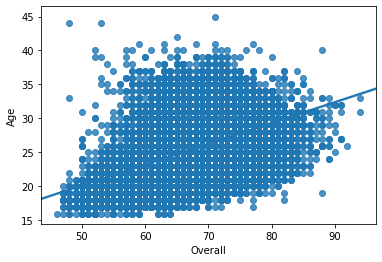

In [67]:
sns.regplot(game_df['Overall'] , game_df['Age'])

- The overall rating increases as the the player reaches his full potential
- This is the trand that is mostly followed, but after 33 overall starts to decrease

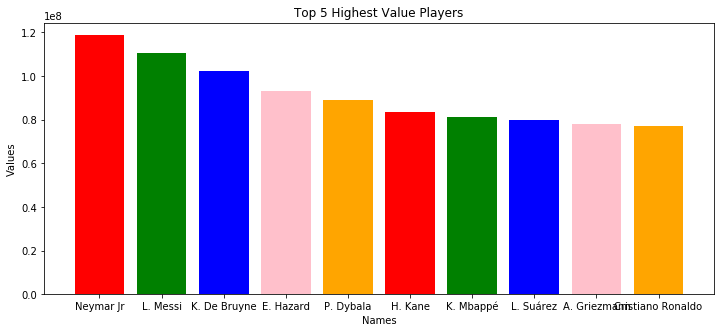

In [68]:
# players with highest values

player_val=game_df[["Name","Value (€)"]]
player_val=player_val.sort_values(by=["Value (€)"],ascending=False)
x=list(player_val["Name"][0:10])
y=list(player_val["Value (€)"][0:10])
plt.figure(figsize=(12,5))
plt.bar(x,y,color=["red","green","blue","pink","orange"])
plt.xlabel("Names")
plt.ylabel("Values")
plt.title("Top 5 Highest Value Players")
plt.show()

- Neymar Jr has the highest value, because he is still young and has a lot of potential to grow

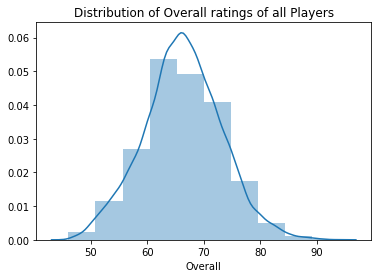

In [69]:
sns.distplot(game_df['Overall'], bins=10)
plt.title("Distribution of Overall ratings of all Players")
plt.show()

- approx. 60% of the players have an overall rating between 60-70

In [70]:
# Clubs with most players
clubs = game_df['Club'].value_counts()[0:10]
clubs

Free Agent                 229
Wolverhampton Wanderers     33
Rayo Vallecano              33
Newcastle United            33
Atlético Madrid             33
Burnley                     33
Empoli                      33
FC Barcelona                33
Valencia CF                 33
TSG 1899 Hoffenheim         33
Name: Club, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

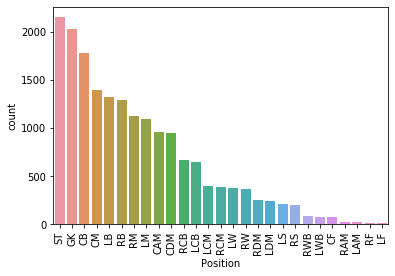

In [71]:
# favourite positions

sns.countplot(x=game_df['Position'], order = game_df['Position'].value_counts().keys())
plt.xticks(rotation=90)

- Most of the players in our dataset are strikers 

# Questions:

## Q. Determine the outliers for Wages and mentioned the steps, process and logic

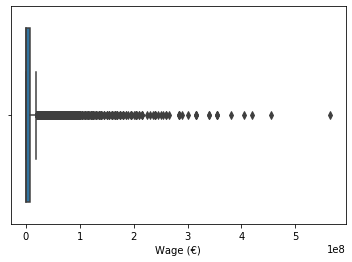

In [72]:
sns.boxplot(game_df['Wage (€)'])

- These are the outliers present in the wages. We need to fix these outliers by using IQR method
- two methods to fix outliers: Remove them or Cap them, Capping the outliers is better in our case

- IQR is the range between the first and the third quartiles namely Q1 and Q3: IQR = Q3 – Q1. The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

In [73]:
# taking 25 percentile

per_25 = game_df["Wage (€)"].quantile(0.25)
per_25

1000.0

In [74]:
# 75 percentile
per_75 = game_df["Wage (€)"].quantile(0.75)
per_75

8000000.0

In [75]:
# finding iqr
iqr = per_75-per_25
iqr

7999000.0

In [76]:
# upper limit
upper_limit=per_75+1.5*iqr
upper_limit

19998500.0

In [77]:
lower_limit=per_25-1.5*iqr
lower_limit

-11997500.0

In [78]:
# finding outliers-->
game_df[game_df["Wage (€)"]>upper_limit]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Value (€),Wage (€)
1,41,Iniesta,34,https://cdn.sofifa.org/players/4/19/41.png,Spain,https://cdn.sofifa.org/flags/45.png,86,86,Vissel Kobe,https://cdn.sofifa.org/teams/2/light/101146.png,2058,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,8.0,"Jul 16, 2018",NA,2021,5'7,150lbs,74,74,74,82,81,81,81,82,85,85,85,82,83,83,83,82,71,73,73,73,71,68,63,63,63,68,77.0,70.0,54.0,90.0,74.0,90.0,80.0,70.0,85.0,92.0,70.0,67.0,79.0,86.0,84.0,65.0,47.0,55.0,58.0,71.0,58.0,66.0,81.0,93.0,71.0,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,€26.9M,21500000.0,21000000.0
2,80,E. Belözoğlu,37,https://cdn.sofifa.org/players/4/19/80.png,Turkey,https://cdn.sofifa.org/flags/48.png,79,79,Medipol Başakşehir FK,https://cdn.sofifa.org/teams/2/light/101014.png,2047,Left,2.0,4.0,4.0,Medium/ Medium,Stocky,No,CM,5.0,"Jul 9, 2015",NA,2019,5'7,159lbs,67,67,67,72,72,72,72,72,76,76,76,73,78,78,78,73,68,74,74,74,68,65,66,66,66,65,80.0,68.0,43.0,86.0,69.0,78.0,83.0,80.0,87.0,82.0,54.0,38.0,68.0,73.0,81.0,77.0,72.0,61.0,65.0,76.0,87.0,66.0,63.0,86.0,85.0,80.0,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0,€7.6M,4000000.0,23000000.0
6,1179,G. Buffon,40,https://cdn.sofifa.org/players/4/19/1179.png,Italy,https://cdn.sofifa.org/flags/27.png,88,88,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,1334,Right,4.0,2.0,1.0,Medium/ Medium,Normal,Yes,GK,1.0,"Jul 6, 2018",NA,2019,6'4,203lbs,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,13.0,15.0,13.0,37.0,17.0,26.0,20.0,13.0,35.0,28.0,49.0,43.0,55.0,79.0,49.0,39.0,75.0,39.0,69.0,13.0,38.0,28.0,12.0,50.0,22.0,70.0,13.0,11.0,11.0,88.0,87.0,74.0,90.0,83.0,€7.4M,4000000.0,77000000.0
17,9014,A. Robben,34,https://cdn.sofifa.org/players/4/19/9014.png,Netherlands,https://cdn.sofifa.org/flags/34.png,84,84,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,2044,Left,4.0,2.0,4.0,High/ Low,Normal,Yes,RM,10.0,"Aug 28, 2009",NA,2019,5'11,176lbs,80,80,80,84,84,84,84,84,83,83,83,82,76,76,76,82,60,57,57,57,60,55,46,46,46,55,80.0,85.0,51.0,82.0,86.0,89.0,90.0,81.0,71.0,88.0,83.0,76.0,87.0,85.0,90.0,86.0,60.0,64.0,67.0,86.0,47.0,37.0,84.0,80.0,78.0,85.0,30.0,26.0,26.0,10.0,8.0,11.0,5.0,15.0,€25.6M,15500000.0,110000000.0
43,20775,Quaresma,34,https://cdn.sofifa.org/players/4/19/20775.png,Portugal,https://cdn.sofifa.org/flags/38.png,84,84,Beşiktaş JK,https://cdn.sofifa.org/teams/2/light/327.png,1988,Right,3.0,4.0,5.0,High/ Low,Normal,Yes,RM,7.0,"Jul 22, 2015",NA,2020,5'9,148lbs,73,73,73,82,80,80,80,82,81,81,81,82,74,74,74,82,58,54,54,54,58,51,41,41,41,51,92.0,67.0,41.0,79.0,80.0,89.0,94.0,73.0,75.0,88.0,84.0,82.0,91.0,78.0,84.0,79.0,63.0,65.0,55.0,80.0,74.0,24.0,78.0,84.0,74.0,80.0,29.0,17.0,13.0,12.0,14.0,10.0,5.0,15.0,€29.5M,15500000.0,80000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17168,244544,B. Alıcı,21,https://cdn.sofifa.org/players/4/19/244544.png,Turkey,https://cdn.sofifa.org/flags/48.png,73,80,Fenerbahçe SK,https://cdn.sofifa.org/teams/2/light/326.png,1758,Right,1.0,4.0,3.0,High/ Medium,Lean,No

- These are the outliers in the wage column
- No lower limit outlier can be found because wages cannot be negetive

In [79]:
newdf_cap = game_df

In [80]:


newdf_cap["Wage (€)"] = np.where(
    newdf_cap["Wage (€)"]>upper_limit,
    upper_limit,
    
    np.where(
    newdf_cap["Wage (€)"]<lower_limit,
    lower_limit,
    newdf_cap["Wage (€)"])

)

In [83]:
newdf_cap[newdf_cap["Wage (€)"]>upper_limit]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Value (€),Wage (€)


In [84]:
newdf_cap.shape

(18147, 88)

- All 2254 outliers have been capped using this method, 
- No loss of data 

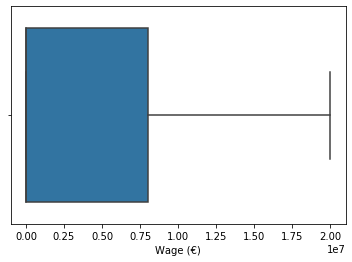

In [86]:
sns.boxplot(game_df['Wage (€)'])

- cleaner data outliers removed

### THE ABOVE IS A STEP-BY-STEP APPROACH TO FIX OUTLIERS

## Q Analyze the distribution for potential column.	

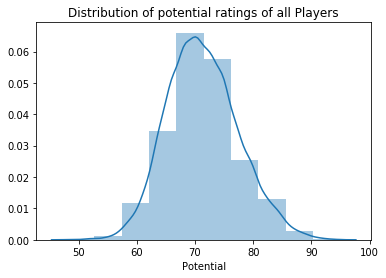

In [87]:
sns.distplot(game_df['Potential'], bins=10)
plt.title("Distribution of potential ratings of all Players")
plt.show()

- most of the players have the potential between 65 to 75
- potential follows a normal distribution

## Q. Difference between normal and standard normal distribution explain.

- both form a bell like curve
- A normal distribution is a continuous probability distribution characterized by a bell-shaped curve. It is symmetric around its mean, with data clustering near the mean and becoming less frequent as you move away from it. It can have any mean or standard deviation
- The standard normal distribution is a specific type of normal distribution where the mean (μ) is 0, and the standard deviation (σ) is 1.
- The potential column in our data set does not have a mean of 0 and thus is a NORMAL DISTRIBUTION

- In machine Learning we have to standardize the data depending on the business problem
- we standardize to compare different normally distributed datasets, perform regression analysis

## Q. Difference between normal and student t distribution explain it.

- Both form a bell like curve
- a student t distribution is like normal distribution only, but has fatter tails and lower and a lower peak